 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [45]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [46]:
# Reading whale returns
whale_path= Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format = True, parse_dates = True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [47]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [48]:
# Identify dtypes
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [49]:
# Drop nulls
whale_df.dropna(inplace=True)

In [50]:
# read dataframe
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [51]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format = True, parse_dates = True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [52]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [53]:
# Drop nulls
algo_df.dropna(inplace=True)

In [54]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [55]:
# Reading S&P TSX 60 Closing Prices
sp_path = Path("Resources/sp_tsx_history.csv")
sp_df = pd.read_csv(sp_path, index_col="Date", infer_datetime_format = True, parse_dates = True)
sp_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [56]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [57]:
# Removing non-numeric values
#sp_df["Close"] = sp_df["Close"].replace({"$":""}, regex=True).astype('float64')
#sp_df["Close"] = sp_df["Close"].replace({",":""}, regex=True).astype('float64')
sp_df['Close'] = sp_df['Close'].replace("[$,]","", regex=True).astype('float64')
sp_df


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [58]:
# Fix Data Types
sp_df['Close'] = sp_df['Close'].astype("float")

In [59]:
# Calculate Daily Returns
sp_returns = sp_df.pct_change()
sp_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [60]:
# Drop nulls
sp_returns.dropna (inplace=True)
sp_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [61]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns= sp_returns.rename(columns={"Close":"sp_returns"}) 
sp_returns.head()

,sp_returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [62]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#all_returns = pd.concat([whale_df, algo_df, sp_df], axis="columns", join="inner") &*&*&*&*&*
#all_returns.sort_index(inplace=True)
#all_returns.columns= ['whale', 'algo', 'sp']  
#all_returns.head()
all_returns = pd.concat([whale_df, algo_df, sp_returns], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns Of All Portfolios'}, xlabel='Date'>

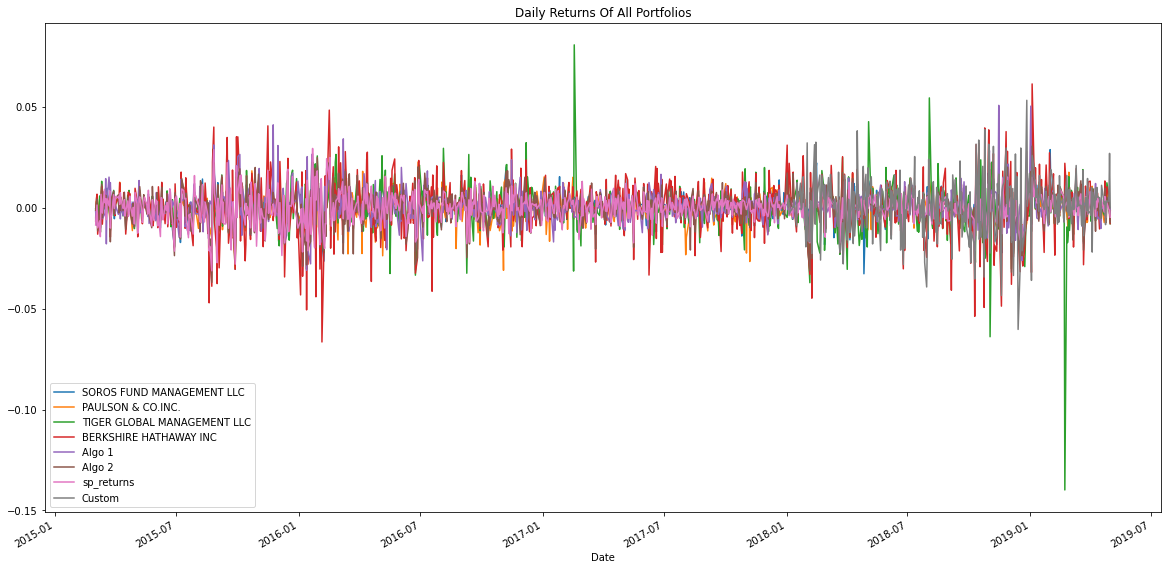

In [93]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(20,10), title="Daily Returns Of All Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='Date'>

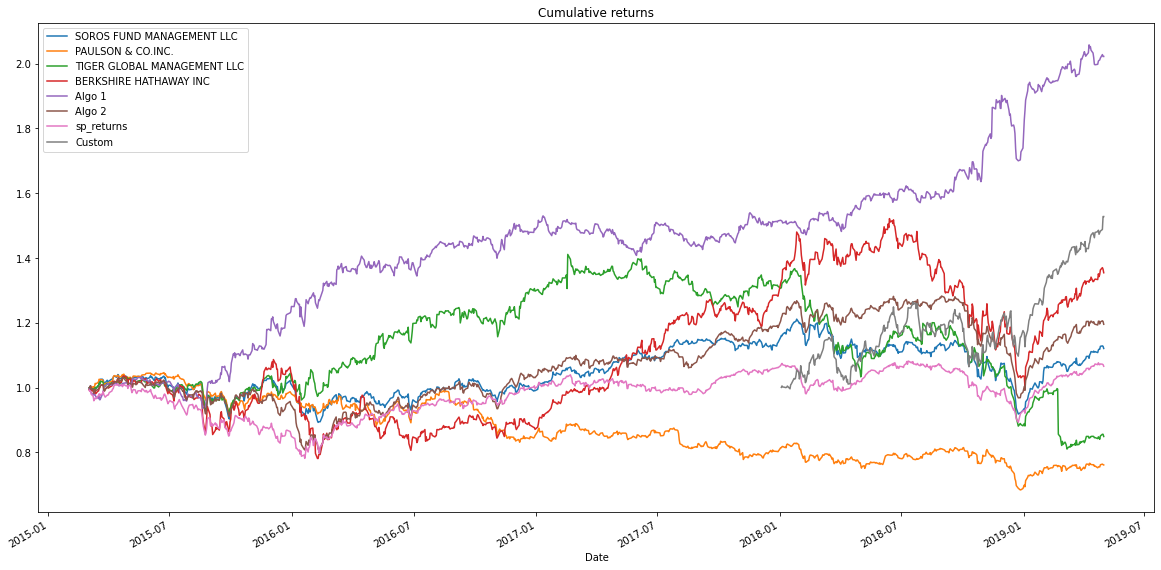

In [95]:
# Calculate cumulative returns of all portfolios
#weights= [0.33, 0.33, 0,33]

cumulative_returns = (1 + all_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk'}>

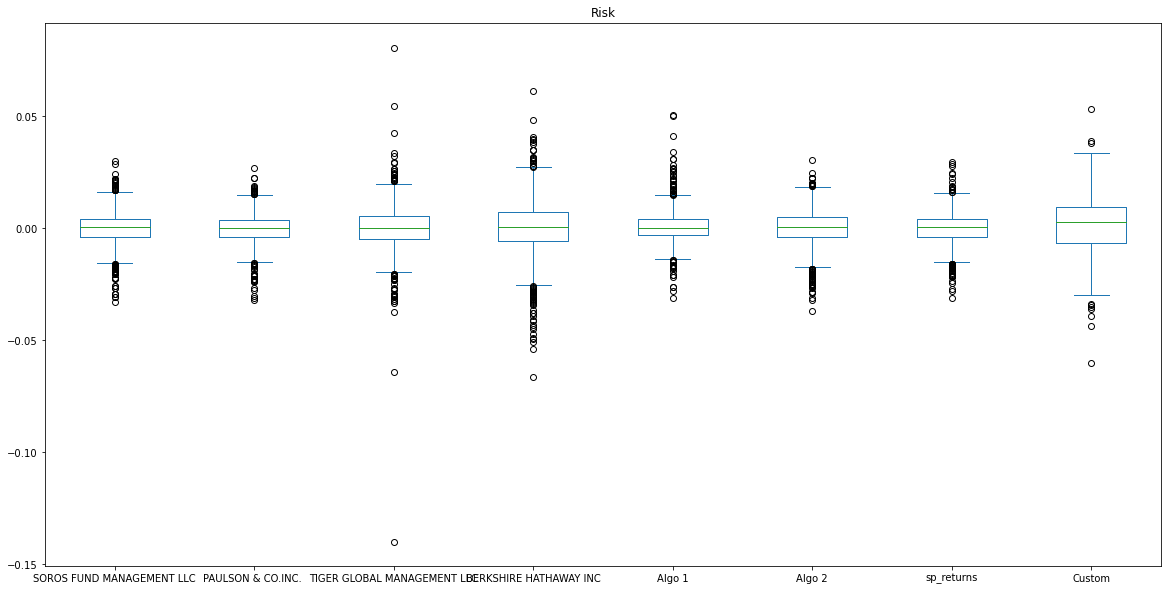

In [98]:
# Box plot to visually show risk
#volatility= all_returns.std() * np.sqrt(252)
#volatility.sort_values(inplace=True)
# volatility.boxplot()
all_returns.plot.box(figsize=(20,10), title="Risk")

### Calculate Standard Deviations

In [99]:
# Calculate the daily standard deviations of all portfolios
std_deviations_allportfolios= all_returns.std()
print(std_deviations_allportfolios)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
sp_returns                     0.007034
Custom                         0.014132
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [67]:
# Calculate  the daily standard deviation of S&P TSX 60

sp_risk = all_returns["sp_returns"].std()

# Determine which portfolios are riskier than the S&P TSX 60
all_returns.std() > sp_risk

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
sp_returns                     False
dtype: bool

### Calculate the Annualized Standard Deviation

In [68]:
# Calculate the annualized standard deviation (252 trading days)
all_returns_std= all_returns.std()
all_returns_std= all_returns_std * np.sqrt(252)
all_returns_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
sp_returns                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

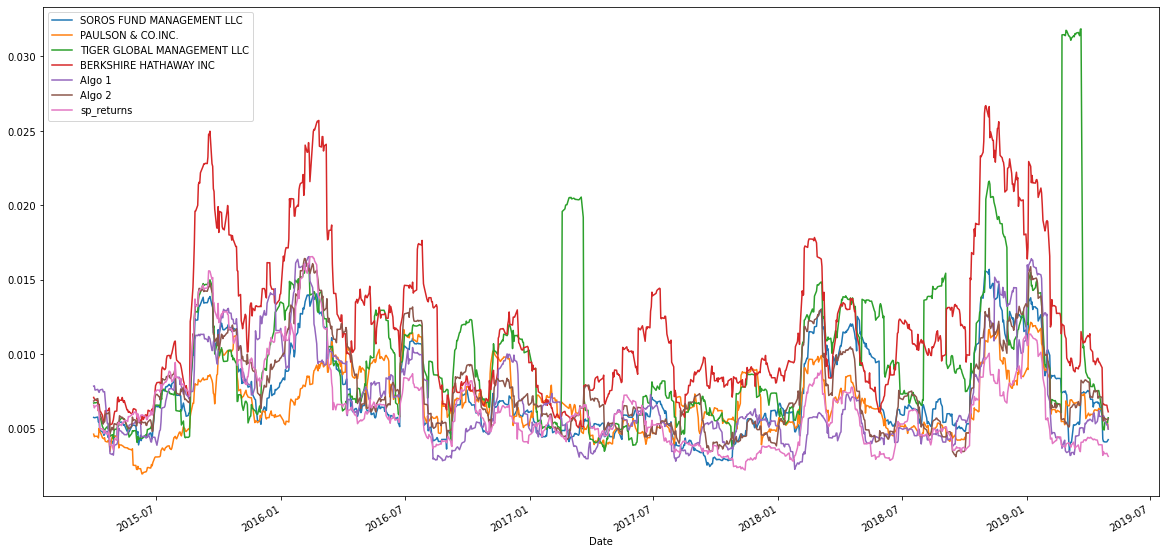

In [69]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns_roll_std = all_returns.rolling(window=21).std()
# Plot the rolling standard deviation
all_returns_roll_std.plot(figsize=(20,10), title="")

### Calculate and plot the correlation

In [70]:
# Calculate the correlation
correlation_df= all_returns.corr()
correlation_df
# Display de correlation matrix
correlation_df.style.background_gradient(cmap="winter")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
sp_returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Beta Trend'}, xlabel='Date'>

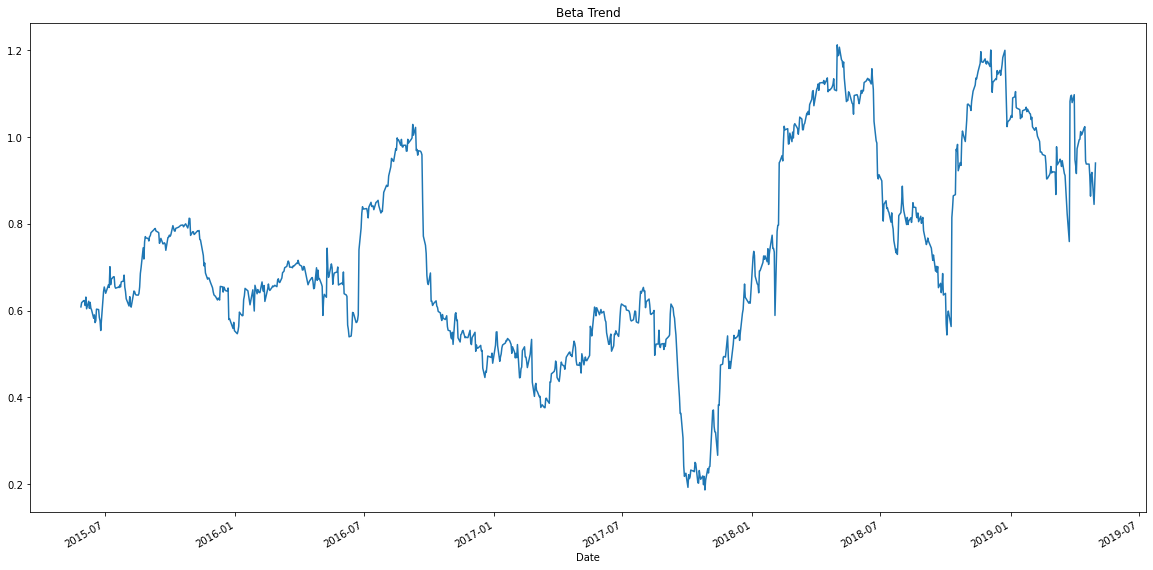

In [100]:
# Calculate covariance of a single portfolio
covariance= all_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(all_returns["sp_returns"])


# Calculate variance of S&P TSX
sp_variance= all_returns["sp_returns"].rolling(60).var()


# Computing beta
beta =covariance/sp_variance

# Plot beta trend
beta.plot(figsize=(20,10), title="Beta Trend")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'EWM witha a 21-day half life'}, xlabel='Date'>

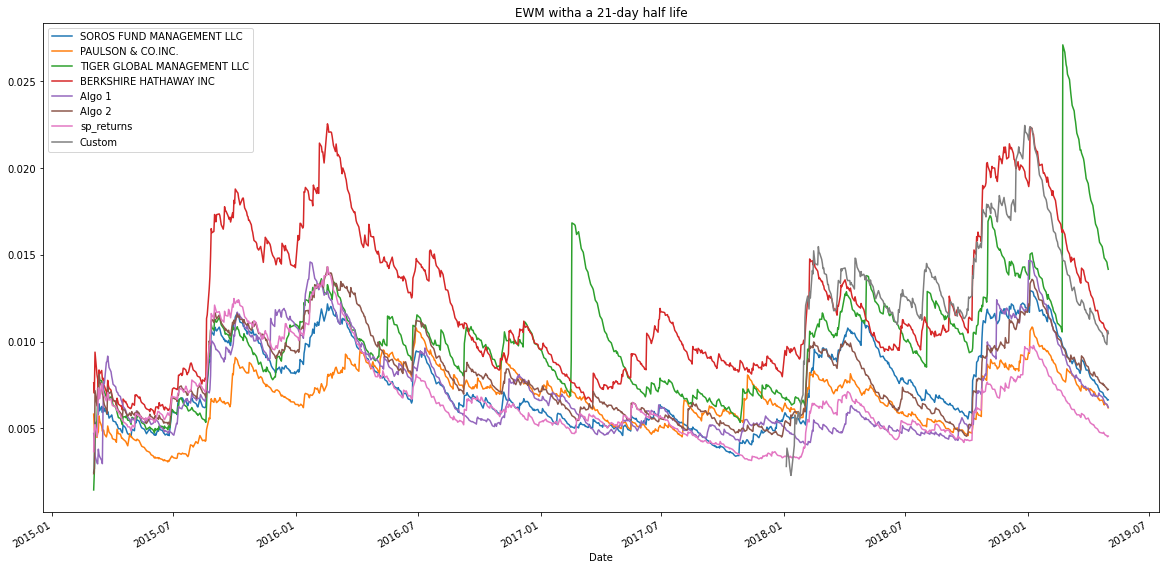

In [101]:
# Use `ewm` to calculate the rolling window
all_returns.ewm(halflife=21).std().plot(figsize=(20,10), title="EWM witha a 21-day half life")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [73]:
# Annualized Sharpe Ratios
sharpe_ratio = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratio
               

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sp_returns                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

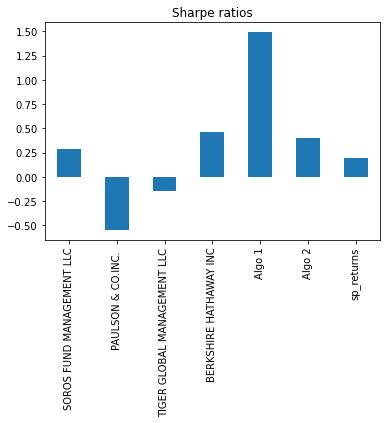

In [102]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1&2 were more attractive the risk-adjusted return. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [75]:
# Reading data from 1st stock
otex_path= Path("Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_path, index_col="Date", infer_datetime_format = True, parse_dates = True)
otex_df

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [76]:
# Reading data from 2nd stock
shop_path= Path("Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_path, index_col="Date", infer_datetime_format = True, parse_dates = True)
shop_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [77]:
# Reading data from 3rd stock
L_path= Path("Resources/l_historical.csv")
L_df = pd.read_csv(L_path, index_col="Date", infer_datetime_format = True, parse_dates = True)
L_df

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [78]:
# Combine all stocks in a single DataFrame
custom_allstocks = pd.concat([otex_df,shop_df, L_df], axis="rows", join="inner")
custom_allstocks.tail()

,Symbol,Close
Date,,
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67
2019-12-27,L,67.78
2019-12-30,L,67.33


In [79]:
# Reset Date index
custom_allstocks.sort_index (inplace=True)

In [80]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio= custom_allstocks.pivot_table(values="Close", index="Date", columns="Symbol")
custom_portfolio


Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [103]:
# Calculate daily returns
custom_dailyreturns = custom_portfolio.pct_change()
# Drop NAs
custom_dailyreturns.dropna (inplace=True) 
# Display sample data
custom_dailyreturns.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [105]:
# Set weights
weights= [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_weighted_returns= custom_dailyreturns.dot(weights)
# Display sample data
#custom_weighted_returns= [[custom_weighted_returns]]
custom_weighted_returns

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [82]:
# Join your returns DataFrame to the original returns DataFrame

all_returns["Custom"]= custom_weighted_returns
all_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_returns,Custom
Date,,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183,0.026937
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703,-0.000079


In [83]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_2nd = all_returns.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [84]:
# Calculate the annualized `std`
risk = all_returns_2nd.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
sp_returns                     0.099121
Custom                         0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-day window Rolling standard deviation'}, xlabel='Date'>

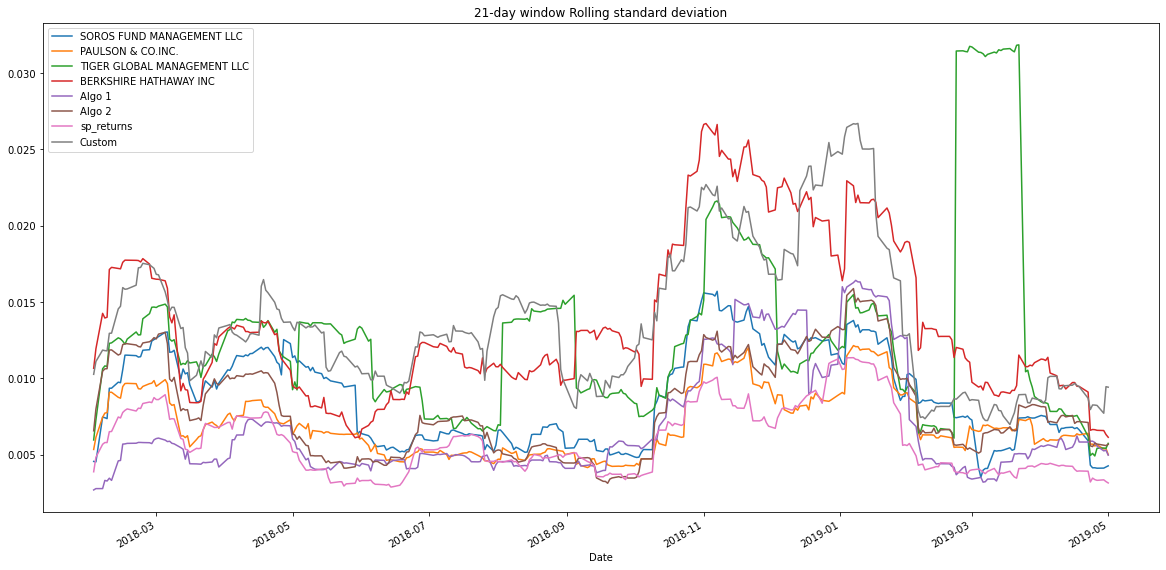

In [106]:
# Calculate rolling standard deviation
rolling_21 = all_returns_2nd.rolling(window=21).std()
# Plot rolling standard deviation
rolling_21.plot(figsize=(20,10), title="21-day window Rolling standard deviation")

### Calculate and plot the correlation

In [88]:
# Calculate and plot the correlation
corr_df =all_returns_2nd.corr()
corr_df.style.background_gradient(cmap="winter")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_returns,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
sp_returns,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
Custom,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

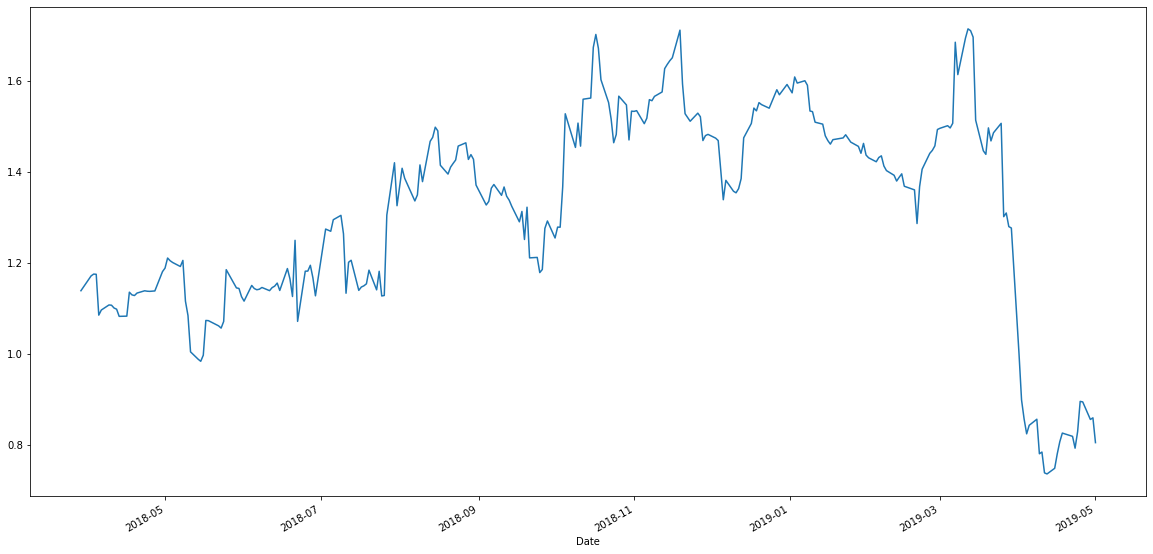

In [89]:
# Calculate and plot Beta
cov = all_returns_2nd["Custom"].rolling(window=60).cov(all_returns_2nd["sp_returns"])
var = all_returns_2nd["sp_returns"].rolling(60).var()
bet = (cov/var)
bet.plot(figsize=(20,10), title="")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [91]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_2nd = (all_returns_2nd.mean() * 252) / (all_returns_2nd.std() * np.sqrt(252))
sharpe_ratio_2nd
        


SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
sp_returns                     0.034651
Custom                         1.564547
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios as a bar plot'}>

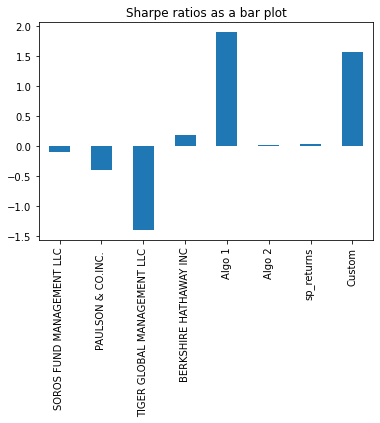

In [107]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_2nd.plot(kind="bar", title="Sharpe ratios as a bar plot")

### How does your portfolio do?

Write your answer here!

In [ ]:
# Algo 1 and Custom portfolios would be more attractive risk-adjusted return than the others. 